# Polynomial Regression

    why need? if the relation between feature and target variable is not linear & check if there is any relation between target variable and higher order terms of feature or interaction term of features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=np.linspace(1,10,10)

In [3]:
b=np.log(a)
c=np.log(a)**2
d=np.log(a)**3


In [4]:
c

array([0.        , 0.48045301, 1.20694896, 1.92181206, 2.59029039,
       3.210402  , 3.78656631, 4.32407713, 4.82779584, 5.30189811])

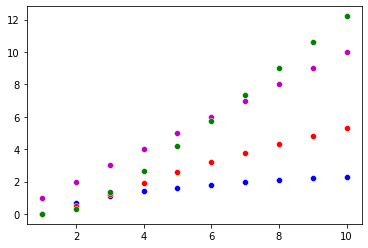

In [5]:
sns.scatterplot(x=a,y=a,color='m')
sns.scatterplot(x=a,y=b,color='b')
sns.scatterplot(x=a,y=c,color='r')
sns.scatterplot(x=a,y=d,color='g');



<AxesSubplot:>

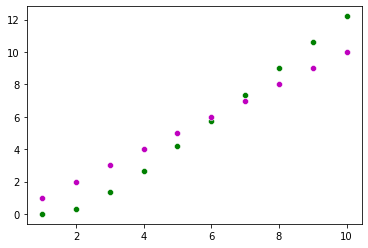

In [6]:
sns.scatterplot(x=a,y=d,color='g')
sns.scatterplot(x=a,y=a,color='m')


<AxesSubplot:>

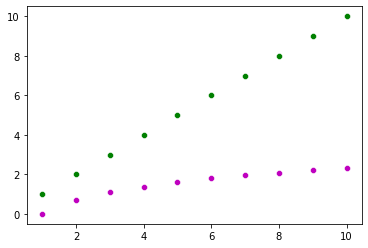

In [7]:
sns.scatterplot(x=a,y=a,color='g')
sns.scatterplot(x=a,y=b,color='m')

In [8]:
df=pd.read_csv('Advertising.csv')

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
X=df.drop('sales',axis=1)
y=df['sales']

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [13]:
polynomial_features=polynomial_converter.fit_transform(X)

In [14]:
polynomial_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [16]:
polynomial_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
predicted=model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE=mean_absolute_error(y_test,predicted)
MSE=mean_squared_error(y_test,predicted)
RMSE=np.sqrt(MSE)

In [25]:
MAE #Error is reduced as compared to Linear regression

0.48967980448037

In [26]:
RMSE # Error is reduced as compared to Linear Regression

0.6646431757269196

In [27]:
poly_residual=y_test-predicted

<AxesSubplot:xlabel='sales', ylabel='sales'>

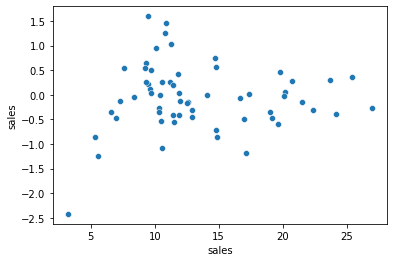

In [28]:
sns.scatterplot(x=y_test,y=poly_residual)

## Overfitting and Underfitting

In [29]:
df=pd.read_csv('Advertising.csv')

In [30]:
X=df.drop('sales',axis=1)
y=df['sales']

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly_model=PolynomialFeatures(degree=2,include_bias=False)

In [33]:
poly_features=poly_model.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
predicted_y=model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
RMSE=np.sqrt(mean_squared_error(y_test,predicted_y))

In [42]:
RMSE

0.6646431757269196

In [43]:
RMSE_Train=[]
RMSE_Test=[]

for d in range(1,10):
    
    #from sklearn.preprocessing import PolynomialFeatures
    polymod=PolynomialFeatures(degree=d,include_bias=False)
    polyfeat=polymod.fit_transform(X)
    
    #from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(polyfeat, y, test_size=0.3, random_state=101)
    
    #from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(X=X_train,y=y_train)
    
    predictedytest=model.predict(X_test)
    predictedytrain=model.predict(X_train)
    
    #from sklearn.metrics import mean_squared_error
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,predictedytrain))
    RMSE_test=np.sqrt(mean_squared_error(y_test,predictedytest))
    
    RMSE_Train.append(RMSE_train)
    RMSE_Test.append(RMSE_test)
    

In [44]:
RMSE_Test

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.4040685804796,
 4449.568027403435,
 95893.02658330933]

In [45]:
RMSE_Train

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088463,
 0.1426544837726474,
 0.16675345956185658]

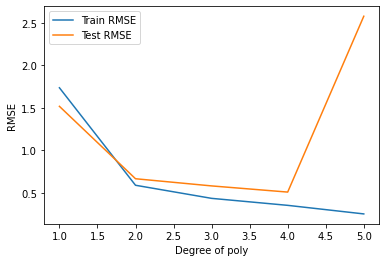

In [46]:
plt.plot(range(1,6),RMSE_Train[:5],label='Train RMSE')
plt.plot(range(1,6),RMSE_Test[:5],label='Test RMSE')

plt.xlabel('Degree of poly')
plt.ylabel('RMSE')

plt.legend()

With this we can choose right degree of polynomial or model complexity for that matter

## Model Deployment - Polynomial Regression 

In [47]:
from joblib import load,dump

In [48]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)
final_polyfeat=final_poly_converter.fit_transform(X)

final_model=LinearRegression()
final_model.fit(final_polyfeat,y)


LinearRegression()

In [49]:
dump(final_poly_converter,"Final_Poly_Converter.joblib")

['Final_Poly_Converter.joblib']

In [50]:
dump(final_model,"Final_Model.joblib")

['Final_Model.joblib']

In [51]:
loaded_converter=load("Final_Poly_Converter.joblib")

In [52]:
loaded_model=load("Final_Model.joblib")

In [53]:
converted_polyfeat=loaded_converter.fit_transform([[149,22,12]])

In [54]:
loaded_model.predict(converted_polyfeat)

array([14.64501014])